<a href="https://colab.research.google.com/github/Adolphsus/CC3001/blob/main/CC3001_Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CC3001 Otoño 2023 Tarea 1 Adolfo Arenas P.

# Pilas de arena abelianas

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian




# Introducción
El objetivo de esta tarea es estudiar un problema inspirado en un fenómeno físico, a través de un modelo matemático, el cual si bien es sencillo, produce resultados que presentan una estructura muy interesante.

<img src="https://ivan-sipiran.com/downloads/arena.png" alt= “” width="200">

La idea es que si uno va formando una pila de arena, llega un momento en que se produce un derrumbe, y la arena de esa pila se derrama hacia los lugares vecinos, estos a su vez se pueden derrumbar, y el proceso continúa hasta que finalmente se estabiliza.

Para estudiar este proceso, usaremos un modelo ultra simplificado. Supondremos que la arena se deposita sobre una superficie plana, la cual está dividida en pequeñas celdas cuadradas, las cuales forman un tablero como se muestra en la siguiente figura:

<img src="https://ivan-sipiran.com/downloads/tablero.png" alt= “” width="100">

El modelo supone que si se apilan demasiados granos de arena en una celda, se produce un derrumbe. En particular, la regla es que si en una celda hay 4 o más granos, se le quitan 4 granos, que se reparten equitativamente hacia las celdas vecinas en los cuatro puntos cardinales.

Para simular este proceso, supondremos que cada celda almacena un número entero, que es la cantidad de granos almacenados en su interior. Aplicando la regla antes descrita (y suponiendo que las celdas que aparecen vacías tienen cero granos), desde la configuración

<img src="https://ivan-sipiran.com/downloads/tablero1.png" alt= “” width="100">

se pasaría a

<img src="https://ivan-sipiran.com/downloads/tablero2.png" alt= “” width="100">

Cuando hay más de una casilla con exceso de granos de arena, la regla se puede aplicar a ellas en cualquier orden y el resultado final es el mismo. Esta propiedad es la que hace que estas pilas de arena se llamen abelianas.

La idea es partir desde una configuración inicial, y luego aplicar esta regla en todos los casilleros que se pueda, hasta que no quede ninguno que tenga 4 o más granos de arena. Esa configuración final la vamos a visualizar asignando un color distinto a cada número de granos.

En particular, nos va a interesar estudiar lo que ocurre cuando la configuración inicial tiene todas las celdas vacías, excepto la del centro, en la cual hay $N$ granos de arena (donde $N$ es un parámetro del problema).

Note que en teoría el tablero es infinito en el sentido que siempre hay espacio para colocar los granos de arena que se van distribuyendo. Para su simulación, usted debe calcular un tamaño del tablero lo suficientemente grande como para estar seguro que ningún grano de arena se salga hacia afuera de los bordes (calcule la máxima área que se puede cubrir con $N$ granos de arena, y después calcule cuan grande debe ser el tablero  para poder contener esa área).

# Tarea

## Parte 1
Usted debe escribir una función en Python llamada ``arena``, tal que dado un valor de $N$, simule el proceso anteriormente descrito hasta que se estabilice. El programa debe contar e imprimir el número total de veces que se aplicó la regla que distribuye granos de arena hacia los vecinos. Además, debe visualizar en la pantalla el tablero resultante, usando los métodos que se describen más adelante.

Por ejemplo, al simular con $N=10000$, la figura que resulta es

<img src="https://ivan-sipiran.com/downloads/tablero3.png" alt= “” width="250">

La idea va a ser ejecutar la función con un valor de $N$ dado por el profesor ($N=128$) y luego con valores crecientes de $N$, hasta el mayor número que pueda alcanzar dentro de un tiempo de ejecución razonable.



Escriba a continuación la definición de su función:

In [ ]:
import matplotlib.pyplot as plt #importamos los modulos para graficar, crear la matriz (tablero) y aproximar
import numpy as np
from math import *
import pandas as pd


def crearTablero(N):
  if N < 16:                      #si N es menor que 16 basta un tablero de 3x3
    tablero = np.zeros((3,3))
    tablero[1][1] = N             #a[1][1] es el centro de la matriz, por lo que ahi depositamos los N granos de arena
  else:
    r = round(sqrt(N/2*pi))       #creamos una matriz de rxr (que depende de N)
    tablero = np.zeros((r,r))
    tablero[r//2][r//2] = N       #depositamos los N granos de arena en el centro de la matriz
  return tablero

In [ ]:
def mostrarTablero(tablero): #funcion que toma una matriz y la grafica
  plt.matshow(tablero)
  plt.show()

In [ ]:
def arena(N):
    m = crearTablero(N) #creamos una matriz con N granos de arena en el centro de ella (o lo mas cercano al centro posible).
    iteraciones = 0 #con esto podemos contar las iteraciones que hace la funcion hasta distribuir todos los granos.
    while True:     #creamos un loop que se base en flag (concepto mencionado por el profesor Inostroza), si flag es 0 el proceso para.
        flag = 0
        for i in range(0, len(m)-1):        #recorremos la matriz para lo cual usamos dos indices, "i" y "j".
            for j in range(0, len(m)-1):
                if m[i][j] >= 4:            #imponemos la condicion de que si una "casilla" (elemento de la matriz)
                    m[i + 1][j] += 1        #tiene mas de cuatro granos de arena, estos se distribuyen a sus vecinos en los puntos cardinales.
                    m[i - 1][j] += 1
                    m[i][j + 1] += 1
                    m[i][j - 1] += 1
                    m[i][j] -= 4
                    flag += 1               #flag se vuelve 1 si ocurre la iteracion, i.e. si se distribuye la arena
                    iteraciones += 1        #suma uno a nuestro contador de iteraciones.
        if flag == 0:                       #si flag == 0 quiere decir que no ocurrio una iteracion, esto es que todas las casillas tienen menos de cuatro
            break                           #granos de arena, por lo cual el loop debe parar.
    print('Se han realizado',iteraciones, 'iteraciones!') #con este print buscamos mostrar las iteraciones realizadas
    return (m, iteraciones) # retornamos una tupla que contiene a la matriz distribuida (tablero) y el numero de iteraciones realizado.

### **Explique aquí cómo calculó el tamaño que necesita tener el tablero.**

Para calcular el área del tablero me puse en dos casos: si el tablero tiene menos de 16 granos de arena basta un tablero de 3x3; Por otra parte, para el caso $N >= 16$ me basé en una frase dicha por el profesor Baloian, el cual aludió a un circunferencia. En base a lo anterior, intenté tomar N pequeños e ir calculando el área formada para luego generalizar usando la conocida fórmula: $\pi*r^2 = Área$ y despejar r. Esto último me dio un tamaño de tablero adecuado, sin embargo quedaba mucho espacio sobrante, por lo cual tras consultar con un auxiliar me recomendó modificar mi r de manera tal que se acortara la distancia, de ahí el $1/2$ introducido en $r = round(sqrt(N/2*pi))$.

Ahora ejecute la función para $N=128$:

In [ ]:
arena(128)

Se han realizado 342 iteraciones!


(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 2., 3., 2., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 2., 3., 1., 3., 2., 2., 0., 0., 0.],
        [0., 0., 0., 1., 2., 0., 1., 3., 1., 0., 2., 1., 0., 0.],
        [0., 0., 0., 2., 3., 1., 2., 3., 2., 1., 3., 2., 0., 0.],
        [0., 0., 0., 3., 1., 3., 3., 0., 3., 3., 1., 3., 0., 0.],
        [0., 0., 0., 2., 3., 1., 2., 3., 2., 1., 3., 2., 0., 0.],
        [0., 0., 0., 1., 2., 0., 1., 3., 1., 0., 2., 1., 0., 0.],
        [0., 0., 0., 0., 2., 2., 3., 1., 3., 2., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 2., 3., 2., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), 342)

Se han realizado 342 iteraciones!


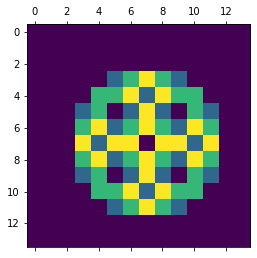

In [ ]:
mostrarTablero(arena(128)[0])

A continuación ejecute la función para el valor más grande de $N$ que consiga alcanzar en un tiempo razonable:

Se han realizado 19369841 iteraciones!


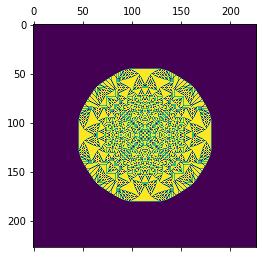

In [ ]:
mostrarTablero(arena(32768)[0]) #13m31s

## Parte 2
Observe que cuando en una celda hay un número grande de granos de arena, es muy ineficiente ir quitándole de 4 en 4, y sería mejor quitar de una sola vez lo más que se pueda. Podemos mejorar nuestro programa si cambiamos la regla de distribución, y decimos que si en una celda hay un número de granos de arena mayor o igual a 4, le quitamos de una sola vez el mayor múltiplo de 4 posible, y todos esos granos lo repartimos equitativamente entre los vecinos de los cuatro puntos cardinales. Escriba una versión modificada de su función de acuerdo a esta nueva regla.



In [ ]:
def arena2(N):
    m = crearTablero(N)
    iteraciones = 0                               #la funcion es una copia de arena() pero con ciertos arreglos a destacar:
    while True:
        flag = 0
        for i in range(0, len(m)-1):
            for j in range(0, len(m)-1):
                if m[i][j]>=4:
                  if m[i][j]%4 == 0:              #1) nos ponemos en el caso de que una casilla sea divisible por 4, de ser asi
                    m[i + 1][j] += (m[i][j]/4)    #distribuimos un cuarto de los granos que hay en la casilla (m[i][j]) en las casillas vecinas
                    m[i - 1][j] += (m[i][j]/4)    #y restamos a la casilla el maximo multiplo de cuatro de modo que esta quede en cero (asi
                    m[i][j + 1] += (m[i][j]/4)    #bajamos de 4 en 4 y distribuimos todo lo posible de una sola vez)
                    m[i][j - 1] += (m[i][j]/4)
                    m[i][j] -= m[i][j]
                    flag += 1
                    iteraciones += 1
                  else:
                    m[i + 1][j] += m[i][j]//4     #2) nos ponemos en el caso de que una casilla NO sea divisible por 4, de ser asi
                    m[i - 1][j] += m[i][j]//4     #distribuimos un cuarto de los granos contenidos en la casilla a sus vecinos, pero
                    m[i][j + 1] += m[i][j]//4     #como solo sirve que sean enteros usamos //4.
                    m[i][j - 1] += m[i][j]//4
                    m[i][j] -= m[i][j]-m[i][j]%4  #con esto le quitamos el maximo multipo de cuatro contenido en m[i][j], por ejemplo si N = 15
                    flag += 1                     # m[i][j] = 15-(15-(12%4)) = 15 - (15-3) = 15 - 12 = 3
                    iteraciones += 1
        if flag == 0:
          break
    print('se han realizado ',iteraciones, 'iteraciones!')
    return (m, iteraciones)

Ahora ejecute la función para $N=128$:

In [ ]:
arena2(128)

se han realizado  227 iteraciones!


(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 2., 3., 2., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 2., 3., 1., 3., 2., 2., 0., 0., 0.],
        [0., 0., 0., 1., 2., 0., 1., 3., 1., 0., 2., 1., 0., 0.],
        [0., 0., 0., 2., 3., 1., 2., 3., 2., 1., 3., 2., 0., 0.],
        [0., 0., 0., 3., 1., 3., 3., 0., 3., 3., 1., 3., 0., 0.],
        [0., 0., 0., 2., 3., 1., 2., 3., 2., 1., 3., 2., 0., 0.],
        [0., 0., 0., 1., 2., 0., 1., 3., 1., 0., 2., 1., 0., 0.],
        [0., 0., 0., 0., 2., 2., 3., 1., 3., 2., 2., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 2., 3., 2., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), 227)

se han realizado  227 iteraciones!


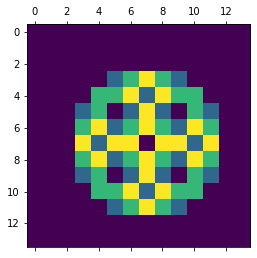

In [ ]:
mostrarTablero(arena2(128)[0])

A continuación ejecute la función para el valor más grande de  𝑁  que consiga alcanzar en un tiempo razonable. Note que éste número no necesariamente es el mismo que para la función anterior:

se han realizado  50009124 iteraciones!


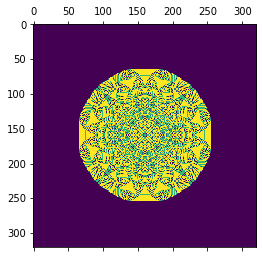

In [ ]:
mostrarTablero(arena2(65536)[0]) #10m59s

## Parte 3
Compare a través de una tabla y un gráfico el número de aplicaciones de la regla que hace el programa en la Parte 1 y el de la Parte 2, para los distintos valores de $N$ que usted haya calculado.

   Granos de arena  Iteraciones arena()  Iteracioens arena2()
0                4                    1                     1
1               16                    9                     6
2               32                   27                    15
3               64                   88                    49
4              128                  342                   227
5              256                 1220                   780
6              512                 5175                  3041
7             1024                20384                 13579
8             2048                78465                 51553
9             4096               312768                205805


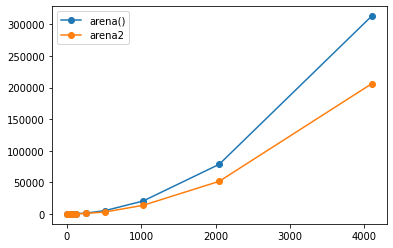

In [ ]:
g_de_arena = [4,16,32,64,128,256,512,1024,2048,4096]    #aqui simplemente probe datos de las dos funciones y los fui anotando
iters1 = [1,9,27,88,342,1220,5175,20384,78465,312768]
iters2 =[1,6,15,49,227,780,3041,13579,51553,205805]
df = pd.DataFrame()
df['Granos de arena'] = g_de_arena
df['Iteraciones arena()'] = iters1
df['Iteracioens arena2()'] = iters2
fig, ax = plt.subplots()
ax.plot(df['Granos de arena'], df['Iteraciones arena()'], marker = "o", label = "arena()")
ax.plot(df['Granos de arena'], df['Iteracioens arena2()'], marker = "o", label = "arena2")
ax.legend()
print(df)


###**Discuta si valió la pena la optimización y discuta también (pero no implemente) otras posibles optimizaciones que se le ocurran.**

Gracias a la tabla podemos notar que al haber reescrito nuestra función arena pudimos lograr realizar el mismo proceso en menos iteraciones y a pesar de que esto no sea tan notable para un N pequeño, gracias al gráfico podemos notar que para un N cada vez mayor la diferencia se va haciendo más significativa. Por otra parte, creo que la mayor optimización en este caso que se le podría hacer sería reducir el tamaño del tablero de manera tal que quede justo, pues así se evitaría crear una matriz tan grande con elementos que en ningun momento son parte del proceso, ahorrando así recursos (una manera de lograr esto quizás sería no disponer de un tablero en un inicio y hacer que se vaya creando conforme se distribuyen los granos de arena).

# Visualización

Para la visualización se recomienda usar arreglos de Numpy y la librería Matplotlib. A continuación un código de ejemplo:

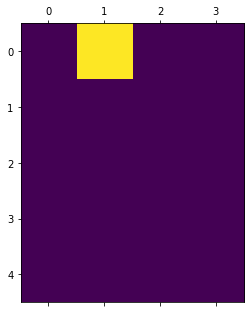

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Crea una matriz de numpy llena de ceros de dimensión 5x4
mat = np.zeros((5,4))

#Asigna un uno en la posición (0,1)
mat[0][1] = 1

#Dibuja
plt.matshow(mat)
plt.show()

## ¿Qué hay que entregar?

Usted debe crear una copia de este documento (del menú seleccionar "Archivo" o "File" y de ahi la opción "guardar copia en Drive" o "save a copy in Drive"). Este nuevo documento (notebook de Colab) es el que debe modificar para luego compartirlo con la opción "Cualquier usuario de internet con este enlace puede ver esto" (o “Anyone on the internet with this link can view”). Esta opción se encuentra disponible en la parte superior derecha de su notebook, en el botón "Compartir" (o "Share"). Una vez que tenga disponible el enlace, colocarlo en la descripción de la entrega de su tarea. No olvide colocar su nombre dentro del notebook.